In [13]:
%pip install -r "requirements.txt"

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd

In [15]:
df = pd.read_csv("employee_churn_data_clean.csv")
df

department  promoted    review  projects  salary  tenure  satisfaction  \
0     operations         0  0.577569         3       0     5.0      0.626759   
1     operations         0  0.751900         3       1     6.0      0.443679   
2        support         0  0.722548         3       1     6.0      0.446823   
3      logistics         0  0.675158         4       2     8.0      0.440139   
4          sales         0  0.676203         3       2     5.0      0.577607   
...          ...       ...       ...       ...     ...     ...           ...   
9535  operations         0  0.610988         4       1     8.0      0.543641   
9536   logistics         0  0.746887         3       1     8.0      0.549048   
9537  operations         0  0.557980         3       0     7.0      0.705425   
9538          IT         0  0.584446         4       1     8.0      0.607287   
9539     finance         0  0.626373         3       0     7.0      0.706455   

      bonus  avg_hrs_month  left  
0         0     180.866070     0  
1         0     182.708149     0  
2         0     184.416084     0  
3         0     188.707545     0  
4         1     179.821083     0  
...     ...            ...   ...  
9535      0     188.155738     1  
9536      0     188.176164     1  
9537      0     186.531008     1  
9538      1     187.641370     1  
9539      1     185.920934     1  

[9540 rows x 10 columns]

In [16]:
df['left'].value_counts()

left
0    6756
1    2784
Name: count, dtype: int64

<Axes: >

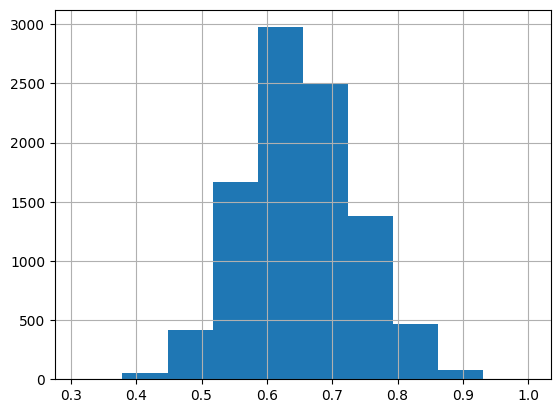

In [17]:
df["review"].hist()

<Axes: >

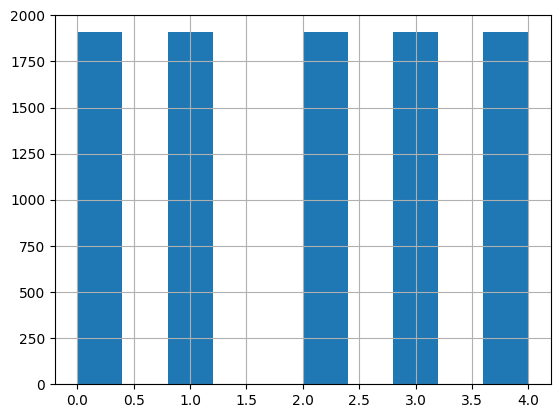

In [18]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=5, encode="ordinal")
df["review"] = discretizer.fit_transform(df["review"].to_numpy().reshape(-1, 1))
df["review"].hist()


<Axes: >

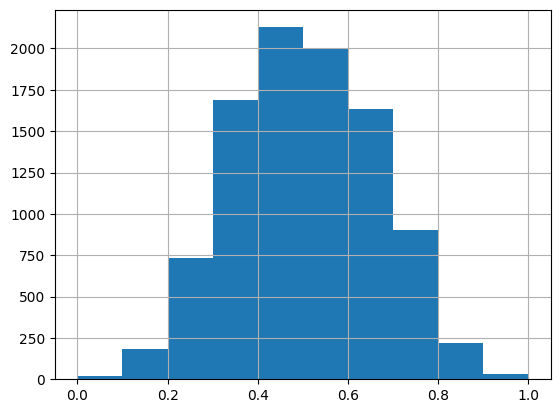

In [19]:
df['satisfaction'].hist()

<Axes: >

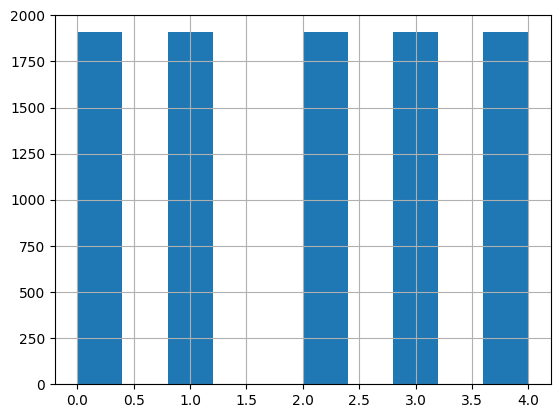

In [20]:
discretizer = KBinsDiscretizer(n_bins=5, encode="ordinal")
df["satisfaction"] = discretizer.fit_transform(df["satisfaction"].to_numpy().reshape(-1, 1))
df["satisfaction"].hist()

<Axes: >

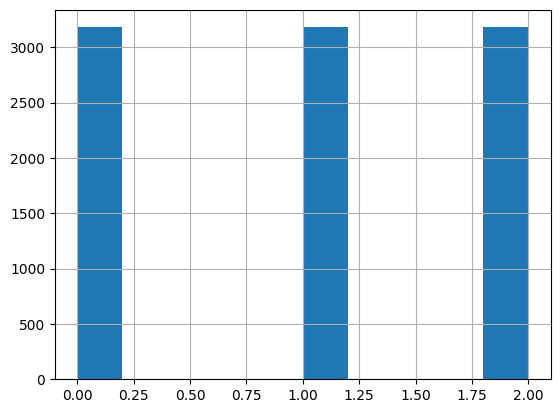

In [21]:
discretizer = KBinsDiscretizer(n_bins=3, encode="ordinal")
df["avg_hrs_month"] = discretizer.fit_transform(df["avg_hrs_month"].to_numpy().reshape(-1, 1))
df["avg_hrs_month"].hist()

In [22]:
from sklearn.feature_extraction.text import HashingVectorizer

hasher = HashingVectorizer(n_features=10, binary=True)
encoded = hasher.fit_transform(df["department"])
encoded = pd.DataFrame(encoded.A, columns=[f"department_{i}" for i in range(hasher.n_features)])
df = pd.concat([encoded.set_index(df.index),df], axis=1)
df = df.drop(["department"],axis=1)
df

department_0  department_1  department_2  department_3  department_4  \
0              0.0           0.0           0.0           0.0           0.0   
1              0.0           0.0           0.0           0.0           0.0   
2              0.0           1.0           0.0           0.0           0.0   
3              0.0           0.0           1.0           0.0           0.0   
4              0.0           0.0           1.0           0.0           0.0   
...            ...           ...           ...           ...           ...   
9535           0.0           0.0           0.0           0.0           0.0   
9536           0.0           0.0           1.0           0.0           0.0   
9537           0.0           0.0           0.0           0.0           0.0   
9538           0.0           0.0           0.0           0.0           0.0   
9539           0.0           0.0           1.0           0.0           0.0   

      department_5  department_6  department_7  department_8  department_9  \
0              0.0           0.0           1.0           0.0           0.0   
1              0.0           0.0           1.0           0.0           0.0   
2              0.0           0.0           0.0           0.0           0.0   
3              0.0           0.0           0.0           0.0           0.0   
4              0.0           0.0           0.0           0.0           0.0   
...            ...           ...           ...           ...           ...   
9535           0.0           0.0           1.0           0.0           0.0   
9536           0.0           0.0           0.0           0.0           0.0   
9537           0.0           0.0           1.0           0.0           0.0   
9538           0.0           0.0           0.0           1.0           0.0   
9539           0.0           0.0           0.0           0.0           0.0   

      promoted  review  projects  salary  tenure  satisfaction  bonus  \
0            0     0.0         3       0     5.0           3.0      0   
1            0     4.0         3       1     6.0           1.0      0   
2            0     3.0         3       1     6.0           1.0      0   
3            0     3.0         4       2     8.0           1.0      0   
4            0     3.0         3       2     5.0           3.0      1   
...        ...     ...       ...     ...     ...           ...    ...   
9535         0     1.0         4       1     8.0           2.0      0   
9536         0     4.0         3       1     8.0           3.0      0   
9537         0     0.0         3       0     7.0           4.0      0   
9538         0     1.0         4       1     8.0           3.0      1   
9539         0     1.0         3       0     7.0           4.0      1   

      avg_hrs_month  left  
0               0.0     0  
1               1.0     0  
2               1.0     0  
3               2.0     0  
4               0.0     0  
...             ...   ...  
9535            2.0     1  
9536            2.0     1  
9537            1.0     1  
9538            2.0     1  
9539            1.0     1  

[9540 rows x 19 columns]

In [24]:
df.to_csv("employee_churn_data_clearned.csv", index= False)

In [25]:
df

department_0  department_1  department_2  department_3  department_4  \
0              0.0           0.0           0.0           0.0           0.0   
1              0.0           0.0           0.0           0.0           0.0   
2              0.0           1.0           0.0           0.0           0.0   
3              0.0           0.0           1.0           0.0           0.0   
4              0.0           0.0           1.0           0.0           0.0   
...            ...           ...           ...           ...           ...   
9535           0.0           0.0           0.0           0.0           0.0   
9536           0.0           0.0           1.0           0.0           0.0   
9537           0.0           0.0           0.0           0.0           0.0   
9538           0.0           0.0           0.0           0.0           0.0   
9539           0.0           0.0           1.0           0.0           0.0   

      department_5  department_6  department_7  department_8  department_9  \
0              0.0           0.0           1.0           0.0           0.0   
1              0.0           0.0           1.0           0.0           0.0   
2              0.0           0.0           0.0           0.0           0.0   
3              0.0           0.0           0.0           0.0           0.0   
4              0.0           0.0           0.0           0.0           0.0   
...            ...           ...           ...           ...           ...   
9535           0.0           0.0           1.0           0.0           0.0   
9536           0.0           0.0           0.0           0.0           0.0   
9537           0.0           0.0           1.0           0.0           0.0   
9538           0.0           0.0           0.0           1.0           0.0   
9539           0.0           0.0           0.0           0.0           0.0   

      promoted  review  projects  salary  tenure  satisfaction  bonus  \
0            0     0.0         3       0     5.0           3.0      0   
1            0     4.0         3       1     6.0           1.0      0   
2            0     3.0         3       1     6.0           1.0      0   
3            0     3.0         4       2     8.0           1.0      0   
4            0     3.0         3       2     5.0           3.0      1   
...        ...     ...       ...     ...     ...           ...    ...   
9535         0     1.0         4       1     8.0           2.0      0   
9536         0     4.0         3       1     8.0           3.0      0   
9537         0     0.0         3       0     7.0           4.0      0   
9538         0     1.0         4       1     8.0           3.0      1   
9539         0     1.0         3       0     7.0           4.0      1   

      avg_hrs_month  left  
0               0.0     0  
1               1.0     0  
2               1.0     0  
3               2.0     0  
4               0.0     0  
...             ...   ...  
9535            2.0     1  
9536            2.0     1  
9537            1.0     1  
9538            2.0     1  
9539            1.0     1  

[9540 rows x 19 columns]

In [26]:
df["avg_hrs_month"].describe()

count    9540.000000
mean        1.000000
std         0.816539
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: avg_hrs_month, dtype: float64

In [27]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
